In [1]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
torch.__version__

'1.10.2'

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
device

device(type='cpu')

## utils

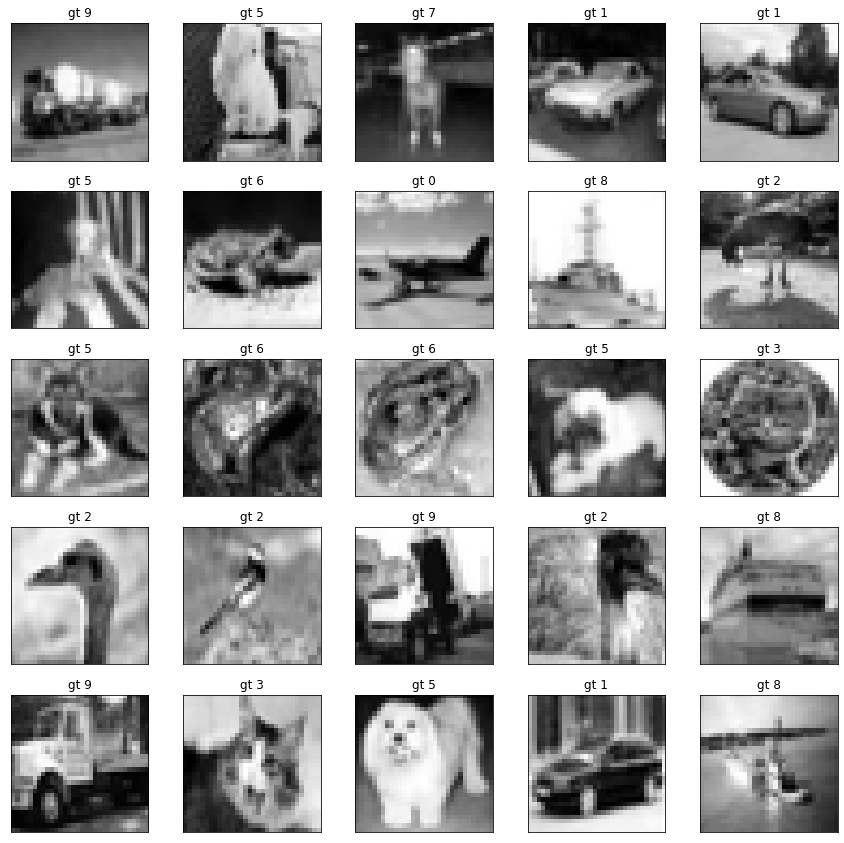

In [188]:
fig = plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.tight_layout()
    plt.imshow(images[i][0], cmap='gray', interpolation='none')
    plt.title("gt {}".format(labels[i]))
    plt.xticks([])
    plt.yticks([])

## dataset 与 dataloader

### dataset

In [5]:
train_dataset = torchvision.datasets.MNIST(root='../data', 
                                           train=True, 
                                           download=True, 
                                           transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='../data', 
                                          train=False, 
                                          download=True, 
                                          transform=transforms.ToTensor())

- shape
- dtype
    - train_mean/std
    - min/max
- classs
- getitem, len

In [10]:
print(train_dataset.data.shape, train_dataset.targets.shape)
print(test_dataset.data.shape, test_dataset.targets.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([10000, 28, 28]) torch.Size([10000])


In [11]:
train_dataset.data.dtype

torch.uint8

In [12]:
print(train_dataset.data.min(), train_dataset.data.max())

tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)


In [16]:
print(train_dataset.data.float().mean(), train_dataset.data.float().std())

tensor(33.3184) tensor(78.5675)


In [8]:
train_dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [25]:
# train_dataset.__getitem__(0)
image, label = train_dataset[0]

In [21]:
# c, h, w
image.shape

torch.Size([1, 28, 28])

In [22]:
label

5

In [23]:
len(train_dataset)

60000

### dataloader

- 内存的考虑

In [27]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=64, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=128, 
                                          shuffle=True)

- batch, enumerte
- last batch
- visualize

In [32]:
len(train_dataset) // 64

937

In [31]:
len(train_loader)

938

In [29]:
images, labels = next(iter(train_loader))

In [30]:
# batch, c, h, w
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [35]:
for batch_idx, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28, 28).to(device)
    if batch_idx == len(train_loader)-1:
        print(images.shape, labels.shape)

torch.Size([32, 28, 28]) torch.Size([32])


In [34]:
len(train_dataset) % 64

32

In [37]:
images, labels = next(iter(train_loader))

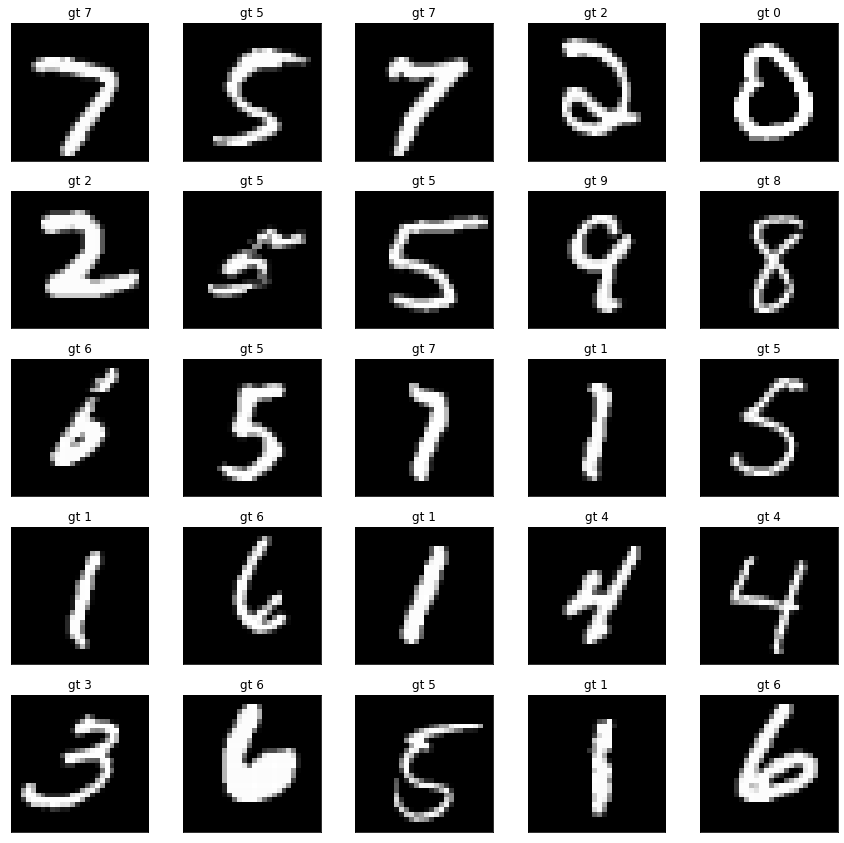

In [38]:
fig = plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.tight_layout()
    plt.imshow(images[i][0], cmap='gray', interpolation='none')
    plt.title("gt {}".format(labels[i]))
    plt.xticks([])
    plt.yticks([])

### fashionmnist

In [39]:
train_dataset = torchvision.datasets.FashionMNIST(root='../data', 
                                           train=True, 
                                           download=True, 
                                           transform=transforms.ToTensor())
test_dataset = torchvision.datasets.FashionMNIST(root='../data', 
                                          train=False, 
                                          download=True, 
                                          transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=64, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=128, 
                                          shuffle=True)

In [40]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [41]:
train_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [42]:
images, labels = next(iter(train_loader))

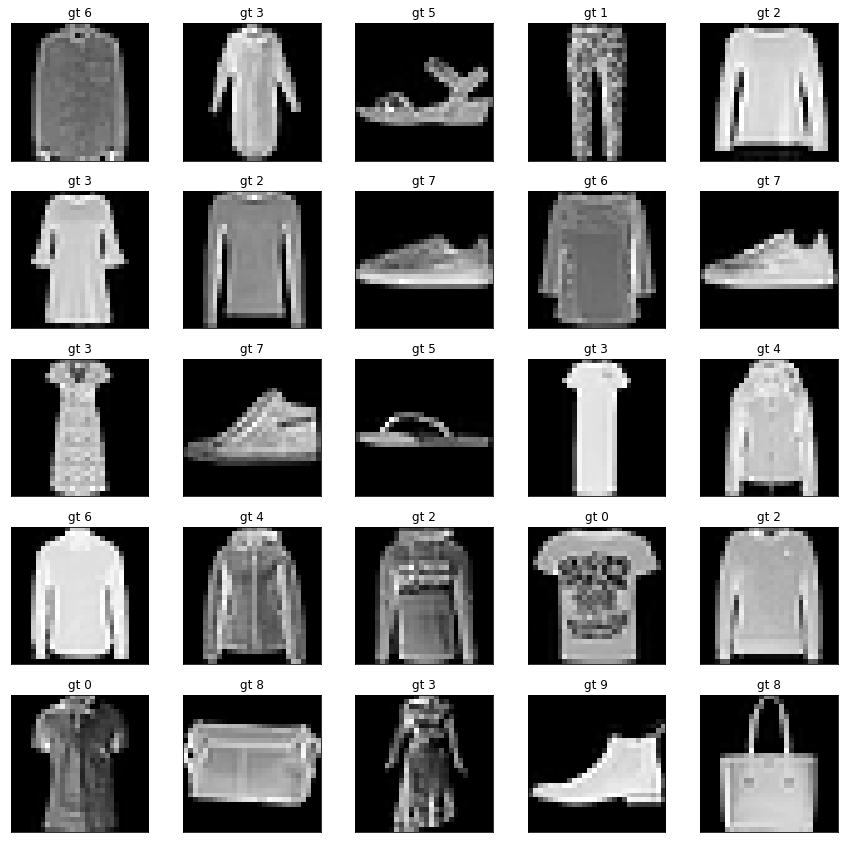

In [43]:
fig = plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.tight_layout()
    plt.imshow(images[i][0], cmap='gray', interpolation='none')
    plt.title("gt {}".format(labels[i]))
    plt.xticks([])
    plt.yticks([])

### cifar

In [44]:
train_dataset = torchvision.datasets.CIFAR10(root='../data', 
                                           train=True, 
                                           download=True, 
                                           transform=transforms.ToTensor())
test_dataset = torchvision.datasets.CIFAR10(root='../data', 
                                          train=False, 
                                          download=True, 
                                          transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=64, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=128, 
                                          shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [46]:
test_dataset.data.shape

(10000, 32, 32, 3)

In [47]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [48]:
images, labels = next(iter(train_loader))

In [50]:
# batch, c, h, w
images.shape

torch.Size([64, 3, 32, 32])

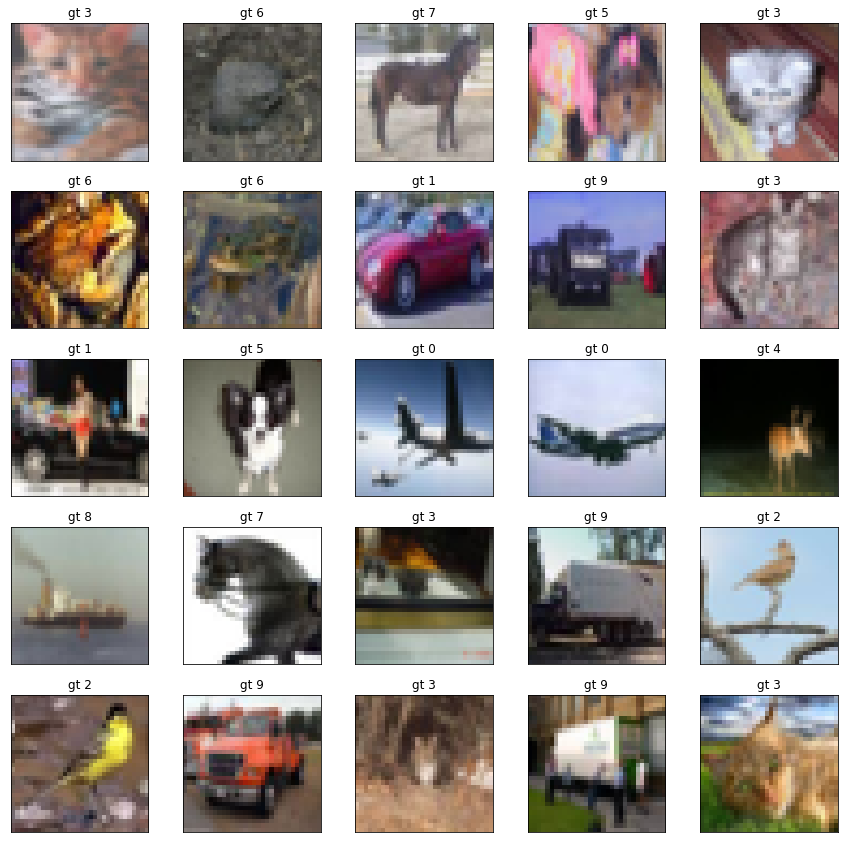

In [52]:
fig = plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.tight_layout()
    plt.imshow(np.transpose(images[i], (1, 2, 0)), interpolation='none')
    plt.title("gt {}".format(labels[i]))
    plt.xticks([])
    plt.yticks([])

### 调用顺序

- enumerate(train_dataloader)
    - DataLoader.\_\_next__
        - dataset.\_\_getitem__
            - transform
        - dataset.\_\_len__